In [3]:
import sklearn
sklearn.__version__

'1.6.1'

In [1]:
import pandas as pd
df = pd.read_csv('./titanic_train.csv', encoding='utf-8')
df
print(dir(df))

['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId', 'Pclass', 'Sex', 'SibSp', 'Survived', 'T', 'Ticket', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__arrow_c_stream__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__dataframe_consortium_standard__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__firstlineno__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__no

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#정규표현식을 통해서 title 분리
df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\user\AppData\Local\Temp\ipykernel_17612\2183319921.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [5]:
df = df.drop(columns=['Name','Parch', 'SibSp', 'Ticket', 'Cabin'])

In [6]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title
0,1,0,3,male,22.0,7.2500,S,Mr
1,2,1,1,female,38.0,71.2833,C,Mrs
2,3,1,3,female,26.0,7.9250,S,Miss
3,4,1,1,female,35.0,53.1000,S,Mrs
4,5,0,3,male,35.0,8.0500,S,Mr


In [7]:
df.info()
print(df['Embarked'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   title        891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


In [8]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title
61,62,1,1,female,38.0,80.0,NaN,Miss
829,830,1,1,female,62.0,80.0,NaN,Mrs


In [ ]:
# 결측치 보간하는 메서드 .interpolate()
# 이번과 같은 범주형 데이터에는 적합하지 않음 -> 라벨링으로 숫자로 바꾼다고해도 중간값이 특별한 의미를 가지지 않음
# 결측값을 제외한 다른 종속변수의 값이 같은 행의 embarked데이터를 활용
# df['Embarked'] = df['Embarked'].interpolate()

C:\Users\user\AppData\Local\Temp\ipykernel_24400\1911536600.py:4: FutureWarning: Series.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df['Embarked'] = df['Embarked'].interpolate()


In [9]:
#최빈값을 넣는것으로 하기로 정했음

#결측값 있는 데이터 찾기

missing_data = df['Embarked'].isnull()

for idx in df[missing_data].PassengerId:
	Pclass = df.loc[df['PassengerId']==idx, 'Pclass'].values[0]
	
	missing = df[
	(df['Pclass'] == Pclass) &
	(df['Embarked'].notnull())
	]

	if not missing.empty:
		df.loc[df['PassengerId']==idx, 'Embarked'] = missing['Embarked'].mode()[0]

print(missing['Embarked'].mode()[0])
print(df['Embarked'].value_counts())

S
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [10]:
#모든 결측값을 최빈값으로 채워넣었음
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   title        891 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_col = ['labeled_Sex', 'labeled_title']
df[new_col] = df[['Sex','title']].apply(le.fit_transform)
df

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,title,labeled_Sex,labeled_title
0,1,0,3,male,22.0,7.2500,S,Mr,1,12
1,2,1,1,female,38.0,71.2833,C,Mrs,0,13
2,3,1,3,female,26.0,7.9250,S,Miss,0,9
3,4,1,1,female,35.0,53.1000,S,Mrs,0,13
4,5,0,3,male,35.0,8.0500,S,Mr,1,12
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,13.0000,S,Rev,1,15
887,888,1,1,female,19.0,30.0000,S,Miss,0,9
888,889,0,3,female,NaN,23.4500,S,Miss,0,9
889,890,1,1,male,26.0,30.0000,C,Mr,1,12


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    891 non-null    int64  
 1   Survived       891 non-null    int64  
 2   Pclass         891 non-null    int64  
 3   Sex            891 non-null    object 
 4   Age            714 non-null    float64
 5   Fare           891 non-null    float64
 6   Embarked       891 non-null    object 
 7   title          891 non-null    object 
 8   labeled_Sex    891 non-null    int64  
 9   labeled_title  891 non-null    int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [18]:
#sex와 title 라벨링 [범주형 데이터 -> 정수형 데이터]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_col = ['labeled_Sex', 'labeled_title', 'labled_Embarked']
df[new_col] = df[['Sex','title', 'Embarked']].apply(le.fit_transform)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    object 
 4   Age              714 non-null    float64
 5   Fare             891 non-null    float64
 6   Embarked         891 non-null    object 
 7   title            891 non-null    object 
 8   labeled_Sex      891 non-null    int64  
 9   labeled_title    891 non-null    int64  
 10  labled_Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [ ]:
#Age에 대한 회귀분석
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


#sex와 title 라벨링 [범주형 데이터 -> 정수형 데이터]
le = LabelEncoder()
new_col = ['labeled_Sex', 'labeled_title', 'labled_Embarked']
df[new_col] = df[['Sex','title', 'Embarked']].apply(le.fit_transform)

features = ['Pclass', 'labeled_Sex', 'labeled_title', 'labled_Embarked']

#Age결측치가 있어서 notnull값만 가지고 훈련 진행
age_notnull = df['Age'].notnull()
X_train, X_test, y_train, y_test = train_test_split(df[age_notnull][features], df[age_notnull]['Age'],
                                                      test_size=0.2, random_state=1)

#선형 회귀
model = LinearRegression()
model.fit(X_train, y_train)

#Age가 없는 데이터 예측
X_test = df[df['Age'].isnull()][features]
pred_age = model.predict(X_test)
pred_age = pred_age.astype(int) #소수점 버림, 정수 형 변환

df.loc[df['Age'].isnull(), 'Age'] = pred_age

In [ ]:
#결측치 모두 채움
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Sex              891 non-null    object 
 4   Age              891 non-null    float64
 5   Fare             891 non-null    float64
 6   Embarked         891 non-null    object 
 7   title            891 non-null    object 
 8   labeled_Sex      891 non-null    int64  
 9   labeled_title    891 non-null    int64  
 10  labled_Embarked  891 non-null    int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [62]:
from sklearn.model_selection import cross_val_score
#선형 회귀
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Age'],
                                                    test_size=0.2, random_state=2)

model.fit(X_train, y_train)
pred = model.predict(X_test)

cv_score=cross_val_score(model, df[features], df['Age'], cv=5, scoring='r2')
print(f'교차검증 점수 :{cv_score}')
print(f'교차검증 평균 점수 :{cv_score.mean():.4f}')


교차검증 점수 :[0.35807863 0.24269895 0.33205685 0.237091   0.21304859]
교차검증 평균 점수 :0.2766


In [63]:
#랜덤 포레스트
model = RandomForestRegressor(n_estimators=150, random_state=22)

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Age'],
                                                    test_size=0.2, random_state=2)

model.fit(X_train, y_train)
pred = model.predict(X_test)

cv_score=cross_val_score(model, df[features], df['Age'], cv=5, scoring='r2')
print(f'교차검증 점수 :{cv_score}')
print(f'교차검증 평균 점수 :{cv_score.mean():.4f}')


교차검증 점수 :[0.42605555 0.34790873 0.407631   0.42236326 0.41122919]
교차검증 평균 점수 :0.4030


In [50]:
#피처 중요도 평가
#두개의 회귀 모델의 지표가 너무 낮아 중요도 평가해보기로 함

X_train, X_test, y_train, y_test = train_test_split(df[features], df['Age'],
                                                    test_size=0.2, random_state=21)

model = RandomForestRegressor(random_state=21)
model.fit(X_train,y_train)

#특성 별 중요도 확인
feature_importances = pd.DataFrame({
  'Feature' : features,
	'Importance' : model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)

           Feature  Importance
2    labeled_title    0.541363
0           Pclass    0.359173
3  labled_Embarked    0.058682
1      labeled_Sex    0.040782


In [60]:
#일반적으로 0.1 (10%) 이상이면 의미 있는 특성으로 간주
#0.02-0.1은 약한 영향
#0.02 미만은 거의 영향 없음
#따라서 Pclass, labeled_title 두개를 가지고 다시한번 예측

feature_mod = ['Pclass','labeled_title']

X_train, X_test, y_train, y_test = train_test_split(df[feature_mod], df['Age'], 
                                                    test_size=0.2, random_state=23)

model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=135, random_state=22)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

pred_linear = model1.predict(X_test)
pred_forest = model2.predict(X_test)

li_cv_score=cross_val_score(model1, df[feature_mod], df['Age'], cv=5, scoring='r2')
print(f'리니어 교차검증 평균 점수 :{li_cv_score.mean():.4f}')

ran_cv_score=cross_val_score(model2, df[feature_mod], df['Age'], cv=5, scoring='r2')
print(f'랜덤 포래스트 평균 점수 : {ran_cv_score.mean():.4f}')

리니어 교차검증 평균 점수 :0.2741
랜덤 포래스트 평균 점수 : 0.4052


c:\ProgramData\anaconda3\envs\sklearn_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\sklearn_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\sklearn_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\envs\sklearn_env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

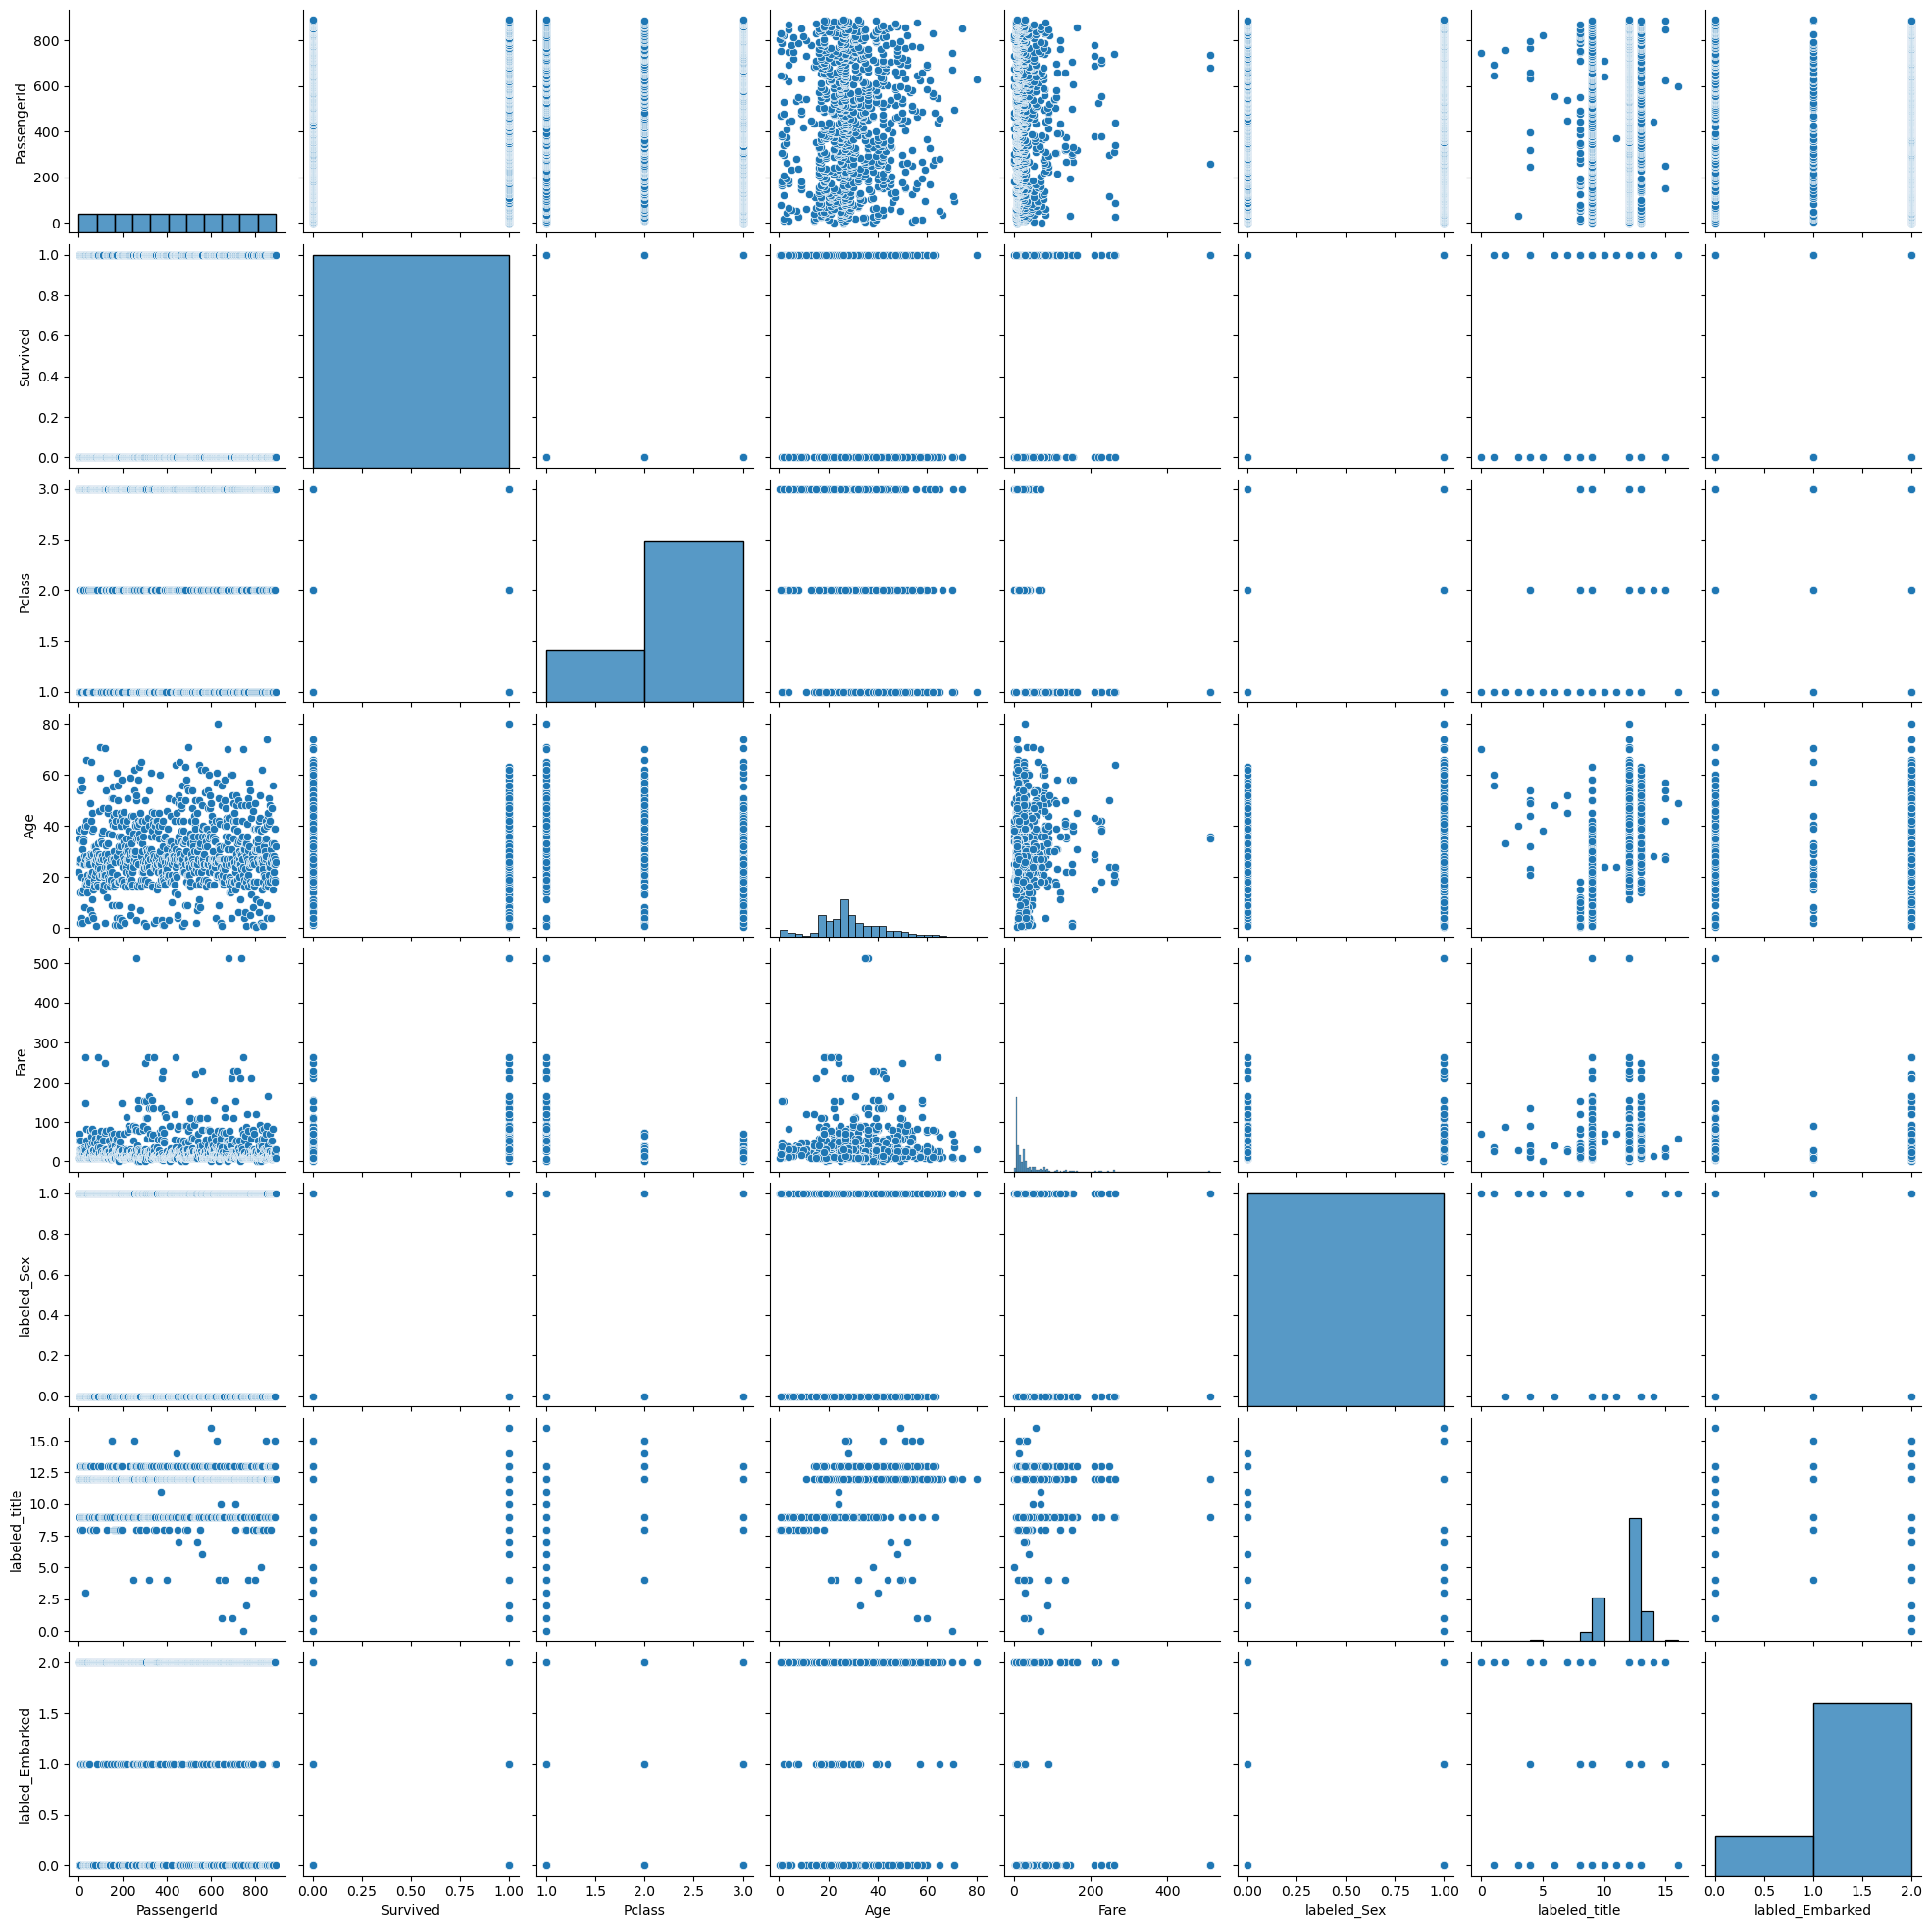

In [64]:
import seaborn as sns
sns.pairplot(df)

In [65]:
correlation_matrix = df[features].corr()
print(correlation_matrix)

                   Pclass  labeled_Sex  labeled_title  labled_Embarked
Pclass           1.000000     0.131900       0.045541         0.162098
labeled_Sex      0.131900     1.000000       0.256407         0.108262
labeled_title    0.045541     0.256407       1.000000         0.066462
labled_Embarked  0.162098     0.108262       0.066462         1.000000
